## functions prep

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def read_dataset(folder, file, date_col=None):
    '''
    folder: is a Path object
    file: the CSV filename
    date_col: specify a date_col to use for index_col
    returns: a pandas DataFrame with a DatetimeIndex
    '''
    df = pd.read_csv(folder/file, 
                     index_col= date_col, 
                     parse_dates=[date_col])
    return df

In [49]:
def plot_dfs(df1,df2,col,title=None,xlabel=None,ylabel=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns=df_missing.loc[:,'missing':].columns.tolist()
    subplots_size = len(columns)
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[col].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname.upper())
    plt.show()

In [11]:
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    returns: a list of scores
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns=df_missing.loc[:,'missing':].columns.tolist()
    scores=[]
    for comp_col in columns[1:]:
        rmse= np.sqrt(np.mean((df1[col]-df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}:{rmse}')
    return scores

## performing data quality checks

In [31]:
co2 = Path('../../datasets/Ch7/co2_missing.csv')
ecom = Path('../../datasets/Ch7/clicks_missing_multiple.csv')

co2_df= pd.read_csv(co2, index_col='year',parse_dates=True)

ecom_df=pd.read_csv(ecom, index_col='date',parse_dates=True)
ecom_df.head()

,price,location,clicks
date,,,
2008-04-01,43.155647,2.0,18784
2008-04-02,43.079056,1.0,24738
NaT,43.842609,NaN,15209
NaT,NaN,1.0,14018
NaT,43.941176,1.0,11974


In [32]:
co2_df.isna().sum()

co2    25
dtype: int64

In [33]:
ecom_df.isnull().sum()

price        1
location     1
clicks      14
dtype: int64

In [34]:
ecom_df.isnull().sum().sum()

16

In [35]:
co2_df[190:195]

,co2
year,
1985-01-01,NaN
1986-01-01,NaN
1987-01-01,NaN
1988-01-01,4.2953
1989-01-01,4.2782


In [36]:
co2_df.isnull().values.any() #check any missing

True

In [37]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226 entries, 1750-01-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     201 non-null    float64
dtypes: float64(1)
memory usage: 3.5 KB


In [38]:
ecom_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135 entries, 2008-04-01 to 2008-08-13
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     134 non-null    float64
 1   location  134 non-null    float64
 2   clicks    121 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.2+ KB


In [39]:
co2_df.describe(include='all',datetime_is_numeric=True)

,co2
count,201.000000
mean,1.590015
std,1.644182
min,0.000000
25%,0.076400
50%,0.935100
75%,2.807600
max,4.907900


In [40]:
ecom_df.describe(include='all',datetime_is_numeric=True)

,price,location,clicks
count,134.000000,134.000000,121
unique,NaN,NaN,119
top,NaN,NaN,?
freq,NaN,NaN,2
mean,43.480221,1.694030,NaN
std,0.610578,1.118724,NaN
min,42.207018,1.000000,NaN
25%,43.038050,1.000000,NaN
50%,43.498842,1.000000,NaN
75%,43.889935,2.000000,NaN


In [42]:
co2_df.replace(0,np.NaN,inplace=True)
ecom_df.replace('?', np.NaN, inplace=True)
ecom_df['clicks']=ecom_df['clicks'].astype('float')

In [43]:
co2_df.isnull().sum()

co2    35
dtype: int64

In [44]:
ecom_df.isnull().sum()

price        1
location     1
clicks      16
dtype: int64

## Uninvariate 

In [47]:
folder = Path('../../datasets/Ch7/')
co2_original = pd.read_csv(folder / 'co2_original.csv')
co2_missing = pd.read_csv(folder / 'co2_missing_only.csv')
clicks_original = pd.read_csv(folder / 'clicks_original.csv')
clicks_missing = pd.read_csv(folder / 'clicks_missing.csv')

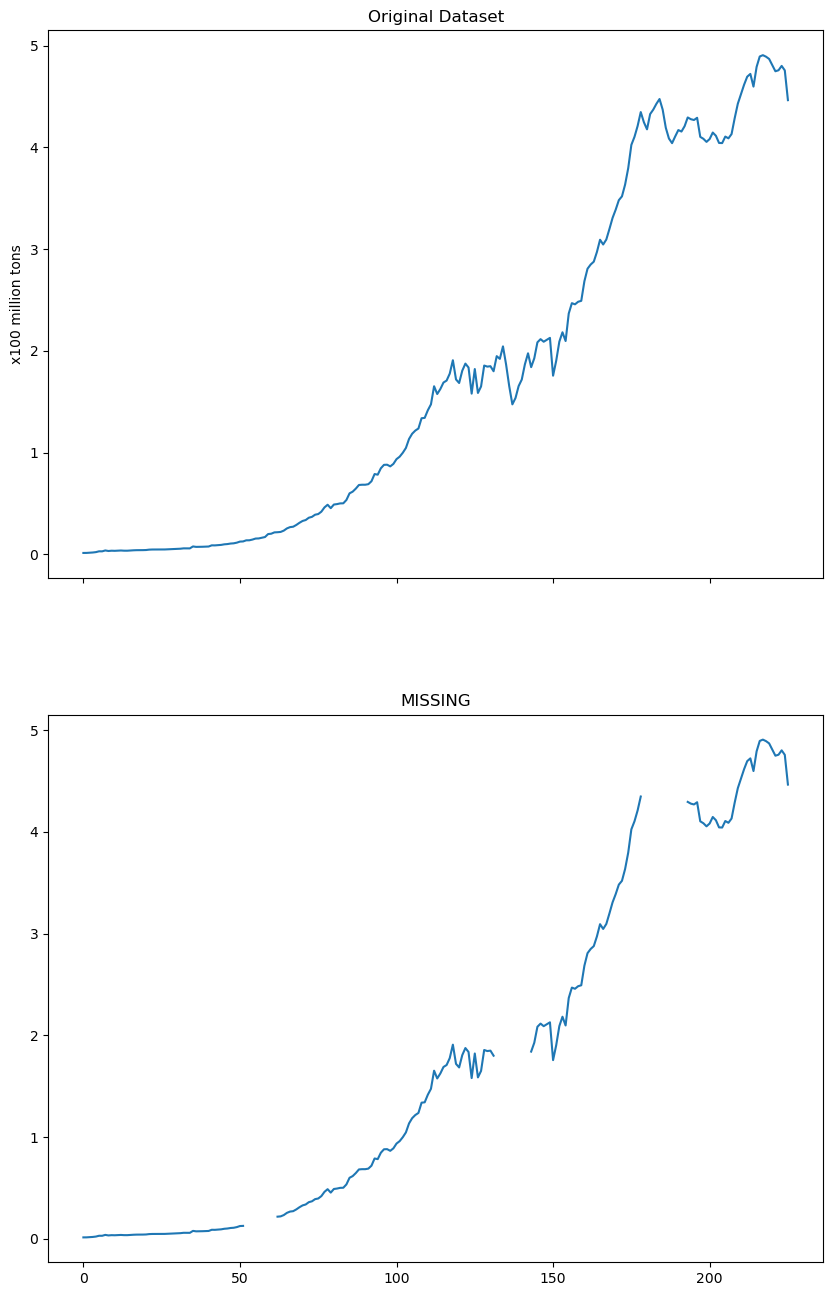

In [50]:
plot_dfs(co2_original,
         co2_missing,
         'co2',
         title="Annual CO2 Emission per Capita",
         xlabel="Years",
         ylabel="x100 million tons")